In [1]:
import torch
from torch import nn,optim
import torch.nn.functional
import torch.nn.functional as F
import numpy as np
import pandas as pd
import os as os
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,multilabel_confusion_matrix
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc,roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from scipy.stats import kurtosis,skew
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import f_classif
import scipy.stats
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel

import pickle
from sklearn.model_selection import cross_val_score

#import warnings

#warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
path_dataframes="/Users/alexdediu/git-projects/Data-Challenge-PHM-Asia-Pacific-2023/dataframes"


In [3]:
df_train_anomaly = pd.read_csv(f"{path_dataframes}/df_anomaly.csv")
df_labels_train = pd.read_csv(f"{path_dataframes}/df_anomaly_labels.csv")
df_train = pd.read_csv(f"{path_dataframes}/df_train.csv")


df_train_anomaly=df_train_anomaly.drop(columns=["Unnamed: 0","pred"])
df_train=df_train.drop(columns="Unnamed: 0")



In [4]:
df_labels_train

,Unnamed: 0.1,Unnamed: 0,Case,Spacecraft,Condition,SV1,SV2,SV3,SV4,BP1,BP2,BP3,BP4,BP5,BP6,BP7,BV1,binary_condition
0,105,105,106,1,2,0,100,100,100,0,0,0,0,0,0,0,0,1
1,106,106,107,1,2,25,100,100,100,0,0,0,0,0,0,0,0,1
2,107,107,108,1,2,50,100,100,100,0,0,0,0,0,0,0,0,1
3,108,108,109,1,2,75,100,100,100,0,0,0,0,0,0,0,0,1
4,109,109,110,1,2,100,0,100,100,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,172,172,173,3,3,100,100,100,100,0,0,0,1,0,0,0,0,1
68,173,173,174,3,3,100,100,100,100,0,0,0,0,1,0,0,0,1
69,174,174,175,3,3,100,100,100,100,0,0,0,0,0,1,0,0,1
70,175,175,176,3,3,100,100,100,100,0,0,0,0,0,0,1,0,1


In [5]:
df_train = df_train[105:177]

In [6]:
df_train

,P1_min,P5_HarmonicAmplitudeRatio,P5_rms,P5_variance,P5_std,P1_median,P1_clearance_factor,P5_min,P1_variance,P1_std,P1_rms,P1_HarmonicAmplitudeRatio,P2_75th_percentile,P2_variance,P2_rms,P2_std,P5_25th_percentile,P2_min,P6_HarmonicAmplitudeRatio,P5_fft_25th_percentile
105,0.563963,0.611073,0.301674,0.328371,0.358106,0.341889,0.267697,0.228739,0.263712,0.294607,0.689480,0.820061,0.404298,0.000001,0.168715,0.000001,0.742798,0.636005,0.763890,0.316795
106,0.000000,0.432084,0.920328,0.972287,0.975392,0.144575,0.829670,0.017883,1.000000,1.000000,0.952962,0.517702,0.744475,0.806982,0.511060,0.825154,0.181802,0.000403,0.581795,0.290664
107,0.079907,0.401804,0.882183,0.958276,0.962897,0.144355,0.858157,0.007345,0.997689,0.997988,0.955945,0.505588,0.711381,0.671879,0.718494,0.698408,0.164252,0.004243,0.549119,0.191246
108,0.127828,0.392466,0.945762,0.972719,0.975777,0.212011,0.870260,0.004342,0.996105,0.996608,0.955908,0.497703,0.731032,0.731195,0.626936,0.754523,0.176166,0.006799,0.521787,0.133184
109,0.818104,0.608123,0.429840,0.321349,0.350809,0.496424,0.182820,0.002761,0.164377,0.186977,0.456168,0.868375,0.419443,0.005956,0.230272,0.006808,0.744361,0.424390,0.716813,0.220123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,0.339054,1.000000,0.205255,0.504254,0.536422,0.048881,0.598945,0.005946,0.585004,0.620029,0.245719,1.000000,0.593336,1.000000,1.000000,1.000000,0.259250,0.087961,0.687747,0.361840
173,0.824787,0.697196,0.719323,0.781425,0.801969,0.509144,0.428516,0.880071,0.583065,0.618157,0.138386,0.717433,0.569406,0.647391,0.448477,0.675020,0.221795,0.040686,0.730663,0.504753
174,0.301860,0.438246,0.344787,0.577233,0.608061,0.772911,0.737837,0.592579,0.531799,0.568273,0.024519,0.362797,0.000000,0.576285,0.348801,0.606348,0.218800,0.026831,0.561968,0.464898
175,0.402989,0.000000,0.204130,0.497790,0.530013,1.000000,0.636050,0.440788,0.500953,0.537907,0.139861,0.000000,0.127847,0.569685,0.239404,0.599916,0.219502,0.024886,0.000000,0.355554


In [7]:
df_features = pd.concat([df_train_anomaly],axis=0)

In [8]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df_features)

# Aggiungi i cluster al dataset originale
df_features['Cluster'] = kmeans.labels_

/Users/alexdediu/anaconda3/envs/pytorch-env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [9]:
df_features['Cluster'].values

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1], dtype=int32)

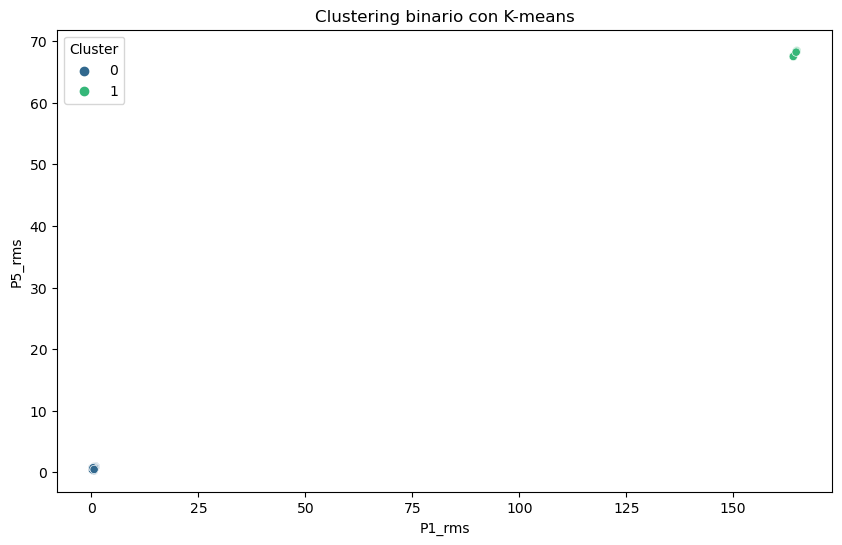

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='P1_rms', y='P5_rms', hue='Cluster', data=df_features, palette='viridis')
plt.title('Clustering binario con K-means')
plt.show()


In [11]:
from sklearn.metrics import silhouette_score

score = silhouette_score(df_features, kmeans.labels_)
print(f'Coefficiente di silhouette: {score}')

Coefficiente di silhouette: 0.9938275543058328


In [12]:
df_features.head()

,P1_min,P5_HarmonicAmplitudeRatio,P5_rms,P5_variance,P5_std,P1_median,P1_clearance_factor,P5_min,P1_variance,P1_std,...,P1_HarmonicAmplitudeRatio,P2_75th_percentile,P2_variance,P2_rms,P2_std,P5_25th_percentile,P2_min,P6_HarmonicAmplitudeRatio,P5_fft_25th_percentile,Cluster
0,0.371555,0.529602,0.538355,0.741722,0.764978,0.495257,0.878211,0.048438,0.886305,0.899719,...,0.534043,0.720100,0.808836,0.740012,0.826867,0.251141,0.892153,0.671782,0.261748,0
1,0.182168,0.428010,0.980064,0.987083,0.988548,0.193701,0.729427,0.003761,0.960428,0.965394,...,0.524429,0.797330,0.679828,0.676689,0.705973,0.174802,0.007976,0.588214,0.018881,0
2,0.162786,0.396816,0.930225,0.928183,0.935939,0.047864,0.868178,0.018448,0.995939,0.996463,...,0.494610,0.775503,0.750242,0.608319,0.772385,0.169909,0.014086,0.519924,0.277822,0
3,1.861598,0.472094,67.564014,1.022777,1.020122,49.069842,0.921347,1.884693,1.254651,1.215672,...,0.443278,27.936155,0.797862,71.296628,0.816715,15.878233,1.726244,0.631157,1.064636,1
4,0.307737,0.621510,0.682774,0.787317,0.807430,0.267645,0.715520,0.592579,0.626103,0.659488,...,0.519669,0.477301,0.430374,0.135904,0.461677,0.200950,0.036904,0.847797,0.153762,0


In [13]:
df_labels_train = df_labels_train.drop(columns="Unnamed: 0.1")

In [14]:
df_labels_train

,Unnamed: 0,Case,Spacecraft,Condition,SV1,SV2,SV3,SV4,BP1,BP2,BP3,BP4,BP5,BP6,BP7,BV1,binary_condition
0,105,106,1,2,0,100,100,100,0,0,0,0,0,0,0,0,1
1,106,107,1,2,25,100,100,100,0,0,0,0,0,0,0,0,1
2,107,108,1,2,50,100,100,100,0,0,0,0,0,0,0,0,1
3,108,109,1,2,75,100,100,100,0,0,0,0,0,0,0,0,1
4,109,110,1,2,100,0,100,100,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,172,173,3,3,100,100,100,100,0,0,0,1,0,0,0,0,1
68,173,174,3,3,100,100,100,100,0,0,0,0,1,0,0,0,1
69,174,175,3,3,100,100,100,100,0,0,0,0,0,1,0,0,1
70,175,176,3,3,100,100,100,100,0,0,0,0,0,0,1,0,1


In [15]:
df_train_anomaly

,P1_min,P5_HarmonicAmplitudeRatio,P5_rms,P5_variance,P5_std,P1_median,P1_clearance_factor,P5_min,P1_variance,P1_std,P1_rms,P1_HarmonicAmplitudeRatio,P2_75th_percentile,P2_variance,P2_rms,P2_std,P5_25th_percentile,P2_min,P6_HarmonicAmplitudeRatio,P5_fft_25th_percentile
0,0.371555,0.529602,0.538355,0.741722,0.764978,0.495257,0.878211,0.048438,0.886305,0.899719,0.687403,0.534043,0.720100,0.808836,0.740012,0.826867,0.251141,0.892153,0.671782,0.261748
1,0.182168,0.428010,0.980064,0.987083,0.988548,0.193701,0.729427,0.003761,0.960428,0.965394,0.902002,0.524429,0.797330,0.679828,0.676689,0.705973,0.174802,0.007976,0.588214,0.018881
2,0.162786,0.396816,0.930225,0.928183,0.935939,0.047864,0.868178,0.018448,0.995939,0.996463,0.976223,0.494610,0.775503,0.750242,0.608319,0.772385,0.169909,0.014086,0.519924,0.277822
3,1.861598,0.472094,67.564014,1.022777,1.020122,49.069842,0.921347,1.884693,1.254651,1.215672,164.065211,0.443278,27.936155,0.797862,71.296628,0.816715,15.878233,1.726244,0.631157,1.064636
4,0.307737,0.621510,0.682774,0.787317,0.807430,0.267645,0.715520,0.592579,0.626103,0.659488,0.188886,0.519669,0.477301,0.430374,0.135904,0.461677,0.200950,0.036904,0.847797,0.153762
5,-0.172830,0.471278,0.941984,0.970282,0.973606,0.228788,0.848656,0.055736,0.934578,0.942619,0.784645,0.532900,0.679189,0.722813,0.570035,0.746639,0.204735,0.029750,0.616498,0.388896
6,0.155755,0.431533,0.940529,0.933203,0.940448,0.164763,0.867371,0.042128,0.985052,0.986965,0.947702,0.505549,0.770602,0.748659,0.619560,0.770904,0.174555,0.013683,0.701148,0.270207
7,1.606368,0.876142,68.437940,1.692797,1.575507,48.425388,1.169796,1.828610,1.656388,1.534463,164.860582,0.879040,28.148379,1.468996,72.180549,1.398747,15.494644,1.432627,1.036779,0.932197
8,0.436355,0.851832,0.767411,0.810122,0.828501,0.027104,0.826624,0.007586,0.987659,0.989241,0.861145,0.836380,0.471871,0.647751,0.374211,0.675365,0.195989,0.434062,0.969590,0.095972
9,0.339054,0.800488,0.257922,0.561733,0.592954,0.300295,0.921245,0.003234,0.768480,0.792894,0.553230,0.706956,0.484101,0.756421,0.600345,0.778163,0.263401,0.083833,0.893415,0.148031


In [16]:
selected_rows = df_features.loc[df_features['Cluster'].isin([0])]
print(selected_rows.index)
df_known =df_features.iloc[selected_rows.index.values]


Index([0, 1, 2, 4, 5, 6, 8, 9, 10, 12, 13, 14, 16, 17, 18, 19, 21, 22], dtype='int64')


In [17]:
df_known = df_known.drop(columns="Cluster")

In [18]:
df_known

,P1_min,P5_HarmonicAmplitudeRatio,P5_rms,P5_variance,P5_std,P1_median,P1_clearance_factor,P5_min,P1_variance,P1_std,P1_rms,P1_HarmonicAmplitudeRatio,P2_75th_percentile,P2_variance,P2_rms,P2_std,P5_25th_percentile,P2_min,P6_HarmonicAmplitudeRatio,P5_fft_25th_percentile
0,0.371555,0.529602,0.538355,0.741722,0.764978,0.495257,0.878211,0.048438,0.886305,0.899719,0.687403,0.534043,0.720100,0.808836,0.740012,0.826867,0.251141,0.892153,0.671782,0.261748
1,0.182168,0.428010,0.980064,0.987083,0.988548,0.193701,0.729427,0.003761,0.960428,0.965394,0.902002,0.524429,0.797330,0.679828,0.676689,0.705973,0.174802,0.007976,0.588214,0.018881
2,0.162786,0.396816,0.930225,0.928183,0.935939,0.047864,0.868178,0.018448,0.995939,0.996463,0.976223,0.494610,0.775503,0.750242,0.608319,0.772385,0.169909,0.014086,0.519924,0.277822
4,0.307737,0.621510,0.682774,0.787317,0.807430,0.267645,0.715520,0.592579,0.626103,0.659488,0.188886,0.519669,0.477301,0.430374,0.135904,0.461677,0.200950,0.036904,0.847797,0.153762
5,-0.172830,0.471278,0.941984,0.970282,0.973606,0.228788,0.848656,0.055736,0.934578,0.942619,0.784645,0.532900,0.679189,0.722813,0.570035,0.746639,0.204735,0.029750,0.616498,0.388896
6,0.155755,0.431533,0.940529,0.933203,0.940448,0.164763,0.867371,0.042128,0.985052,0.986965,0.947702,0.505549,0.770602,0.748659,0.619560,0.770904,0.174555,0.013683,0.701148,0.270207
8,0.436355,0.851832,0.767411,0.810122,0.828501,0.027104,0.826624,0.007586,0.987659,0.989241,0.861145,0.836380,0.471871,0.647751,0.374211,0.675365,0.195989,0.434062,0.969590,0.095972
9,0.339054,0.800488,0.257922,0.561733,0.592954,0.300295,0.921245,0.003234,0.768480,0.792894,0.553230,0.706956,0.484101,0.756421,0.600345,0.778163,0.263401,0.083833,0.893415,0.148031
10,0.405805,0.263327,0.649340,0.793566,0.813214,0.693373,0.584838,0.419350,0.586832,0.621794,0.253273,0.183778,0.545799,0.436139,0.036974,0.467494,0.209820,0.025448,0.234216,0.098853
12,0.167160,0.339856,0.812565,0.870523,0.883807,0.016741,0.990733,0.009720,0.906205,0.917463,0.785012,0.449199,0.748350,0.858009,0.811091,0.872061,0.157568,0.013006,0.480677,0.392654


In [19]:
X_train, X_test, y_train, y_test = train_test_split(df_train, df_labels_train["Condition"], test_size=0.33, random_state=42)

# Creiamo il modello di Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Addestriamo il modello
random_forest.fit(X_train, y_train)

# Effettuiamo delle predizioni sul set di test
predictions = random_forest.predict(X_test)

# Calcoliamo l'accuratezza del modello
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Calcoliamo la matrice di confusione
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Stampiamo il report di classificazione
class_report = classification_report(y_test, predictions)
print("Classification Report:")
print(class_report)


Accuracy: 1.0
Confusion Matrix:
[[18  0]
 [ 0  6]]
Classification Report:
              precision    recall  f1-score   support

           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00         6

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



In [20]:
y_pred_values = random_forest.predict(df_known)
y_pred_values

array([3, 2, 2, 3, 3, 2, 3, 3, 3, 2, 3, 2, 3, 2, 2, 3, 3, 3])

In [21]:
idx= np.array(y_pred_values)

# Trova gli indici degli elementi uguali a 2
indices = np.where(idx == 3)[0]


In [22]:
df_anomaly_test = df_known.iloc[indices]

In [23]:
df_known

,P1_min,P5_HarmonicAmplitudeRatio,P5_rms,P5_variance,P5_std,P1_median,P1_clearance_factor,P5_min,P1_variance,P1_std,P1_rms,P1_HarmonicAmplitudeRatio,P2_75th_percentile,P2_variance,P2_rms,P2_std,P5_25th_percentile,P2_min,P6_HarmonicAmplitudeRatio,P5_fft_25th_percentile
0,0.371555,0.529602,0.538355,0.741722,0.764978,0.495257,0.878211,0.048438,0.886305,0.899719,0.687403,0.534043,0.720100,0.808836,0.740012,0.826867,0.251141,0.892153,0.671782,0.261748
1,0.182168,0.428010,0.980064,0.987083,0.988548,0.193701,0.729427,0.003761,0.960428,0.965394,0.902002,0.524429,0.797330,0.679828,0.676689,0.705973,0.174802,0.007976,0.588214,0.018881
2,0.162786,0.396816,0.930225,0.928183,0.935939,0.047864,0.868178,0.018448,0.995939,0.996463,0.976223,0.494610,0.775503,0.750242,0.608319,0.772385,0.169909,0.014086,0.519924,0.277822
4,0.307737,0.621510,0.682774,0.787317,0.807430,0.267645,0.715520,0.592579,0.626103,0.659488,0.188886,0.519669,0.477301,0.430374,0.135904,0.461677,0.200950,0.036904,0.847797,0.153762
5,-0.172830,0.471278,0.941984,0.970282,0.973606,0.228788,0.848656,0.055736,0.934578,0.942619,0.784645,0.532900,0.679189,0.722813,0.570035,0.746639,0.204735,0.029750,0.616498,0.388896
6,0.155755,0.431533,0.940529,0.933203,0.940448,0.164763,0.867371,0.042128,0.985052,0.986965,0.947702,0.505549,0.770602,0.748659,0.619560,0.770904,0.174555,0.013683,0.701148,0.270207
8,0.436355,0.851832,0.767411,0.810122,0.828501,0.027104,0.826624,0.007586,0.987659,0.989241,0.861145,0.836380,0.471871,0.647751,0.374211,0.675365,0.195989,0.434062,0.969590,0.095972
9,0.339054,0.800488,0.257922,0.561733,0.592954,0.300295,0.921245,0.003234,0.768480,0.792894,0.553230,0.706956,0.484101,0.756421,0.600345,0.778163,0.263401,0.083833,0.893415,0.148031
10,0.405805,0.263327,0.649340,0.793566,0.813214,0.693373,0.584838,0.419350,0.586832,0.621794,0.253273,0.183778,0.545799,0.436139,0.036974,0.467494,0.209820,0.025448,0.234216,0.098853
12,0.167160,0.339856,0.812565,0.870523,0.883807,0.016741,0.990733,0.009720,0.906205,0.917463,0.785012,0.449199,0.748350,0.858009,0.811091,0.872061,0.157568,0.013006,0.480677,0.392654


In [24]:
df_anomaly_test.to_csv(f"{path_dataframes}/df_test_bubble.csv")

In [25]:
df_anomaly_test

,P1_min,P5_HarmonicAmplitudeRatio,P5_rms,P5_variance,P5_std,P1_median,P1_clearance_factor,P5_min,P1_variance,P1_std,P1_rms,P1_HarmonicAmplitudeRatio,P2_75th_percentile,P2_variance,P2_rms,P2_std,P5_25th_percentile,P2_min,P6_HarmonicAmplitudeRatio,P5_fft_25th_percentile
0,0.371555,0.529602,0.538355,0.741722,0.764978,0.495257,0.878211,0.048438,0.886305,0.899719,0.687403,0.534043,0.720100,0.808836,0.740012,0.826867,0.251141,0.892153,0.671782,0.261748
4,0.307737,0.621510,0.682774,0.787317,0.807430,0.267645,0.715520,0.592579,0.626103,0.659488,0.188886,0.519669,0.477301,0.430374,0.135904,0.461677,0.200950,0.036904,0.847797,0.153762
5,-0.172830,0.471278,0.941984,0.970282,0.973606,0.228788,0.848656,0.055736,0.934578,0.942619,0.784645,0.532900,0.679189,0.722813,0.570035,0.746639,0.204735,0.029750,0.616498,0.388896
8,0.436355,0.851832,0.767411,0.810122,0.828501,0.027104,0.826624,0.007586,0.987659,0.989241,0.861145,0.836380,0.471871,0.647751,0.374211,0.675365,0.195989,0.434062,0.969590,0.095972
9,0.339054,0.800488,0.257922,0.561733,0.592954,0.300295,0.921245,0.003234,0.768480,0.792894,0.553230,0.706956,0.484101,0.756421,0.600345,0.778163,0.263401,0.083833,0.893415,0.148031
10,0.405805,0.263327,0.649340,0.793566,0.813214,0.693373,0.584838,0.419350,0.586832,0.621794,0.253273,0.183778,0.545799,0.436139,0.036974,0.467494,0.209820,0.025448,0.234216,0.098853
13,0.105096,0.664471,0.288468,0.608932,0.638779,0.383147,0.908175,0.046552,0.778342,0.801954,0.502408,0.784062,0.750721,0.796785,0.787849,0.815719,0.259506,0.163069,0.777397,0.363455
16,0.402706,0.052288,0.400484,0.659057,0.686878,1.015911,0.728371,0.426343,0.555702,0.591622,0.229923,0.072575,0.203143,0.525587,0.160693,0.556670,0.195262,0.024682,0.174033,0.147140
19,0.428901,0.859325,0.687550,0.769551,0.790941,0.139290,0.954570,0.007586,0.925761,0.934820,0.727230,0.841138,0.351675,0.726382,0.519890,0.749998,0.204061,0.426315,1.013021,0.166953
21,0.749174,0.789116,0.731926,0.848831,0.864028,0.461870,0.595093,0.933344,0.699066,0.728472,0.352938,0.787505,0.710956,0.576029,0.396202,0.606099,0.239268,0.040168,0.976754,0.285559
